In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [4]:
df.shape

(271116, 15)

In [5]:
# Filtering Summer Season
df = df[df['Season'] == 'Summer']

In [6]:
df.shape # after filtering

(222552, 15)

In [7]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [8]:
region_df

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [9]:
df = df.merge(region_df, on='NOC', how='left')

In [10]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [11]:
# Number of contries participated in Olympic
df['region'].unique().shape

(206,)

In [12]:
# check NULL values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
 # check duplicates
df.duplicated().sum()

1385

In [14]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum() # All the duplicate values have been removed 

0

In [16]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [17]:
# OneHotEncoding the `Medal` column
df = pd.concat([df, pd.get_dummies(df['Medal'])], axis=1)

In [18]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,AHO,0,1,0
226,LBR,0,0,0
227,LCA,0,0,0
228,LES,0,0,0


In [19]:
# removing anomilies
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [20]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [21]:
# check Gold medals for INDIA
medal_tally[medal_tally['region'] == 'India']

,region,Gold,Silver,Bronze
46,India,9,7,12


In [22]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [23]:
medal_tally.head()

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777


In [24]:
years = df['Year'].unique().tolist()

In [25]:
years.sort()

In [26]:
# insert text 'Overall' to the years list
years.insert(0, 'Overall')

In [27]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [28]:
country = np.unique(df['region'].dropna().values).tolist()

In [29]:
country.sort()

In [30]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [31]:
# insert text 'Overall' to the country list
country.insert(0, 'Overall')

In [32]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [33]:
 medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [34]:
def fetch_medal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year=='OverAll' and country=='OverAll':
        temp_df=medal_df
    if year=='OverAll' and country!='OverAll':
        flag = 1
        temp_df=medal_df[medal_df['region']==country]
    if year!='OverAll' and country=='OverAll':
        temp_df=medal_df[medal_df['Year']==int(year)]
    if year!='OverAll' and country!='OverAll':
        temp_df=medal_df[(medal_df['Year']==int(year))&(medal_df['region']==country)]
    
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [35]:
# testing the function
fetch_medal_tally(df=medal_df,year='OverAll',country='India')

NameError: name 'medal_df' is not defined

#### Overall Analysis
- No. of editions
- No. of cities
- No. of events / sports
- No. of athletes
- Participating Nations

In [36]:
# No. of editions
# The 1906 olympics does not considerd beacause it did not follow 4 year cycle,
# Hence Total no. of olympics is 28.
# substracting 1 from overall olympic editions
df['Year'].unique().shape[0]-1

28

In [37]:
# No. of cities
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [38]:
# No. of Sports
df['Sport'].unique().shape

(52,)

In [39]:
# No. of Events
df['Event'].unique().shape

(651,)

In [40]:
# No. of athlete
df['Name'].unique().shape

(116122,)

In [41]:
df['region'].unique().shape

(206,)

In [42]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,False,False,False


In [43]:
# No. of participating nations every year
nations_over_time = df.drop_duplicates(subset=['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [44]:
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
fig=px.line(data_frame=nations_over_time, x='Year',y='count')
fig.show()

In [ ]:
# over the years no. of events in olympic
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [47]:
x = df.drop_duplicates(['Year','Sport','Event'])

<Axes: xlabel='Year', ylabel='Sport'>

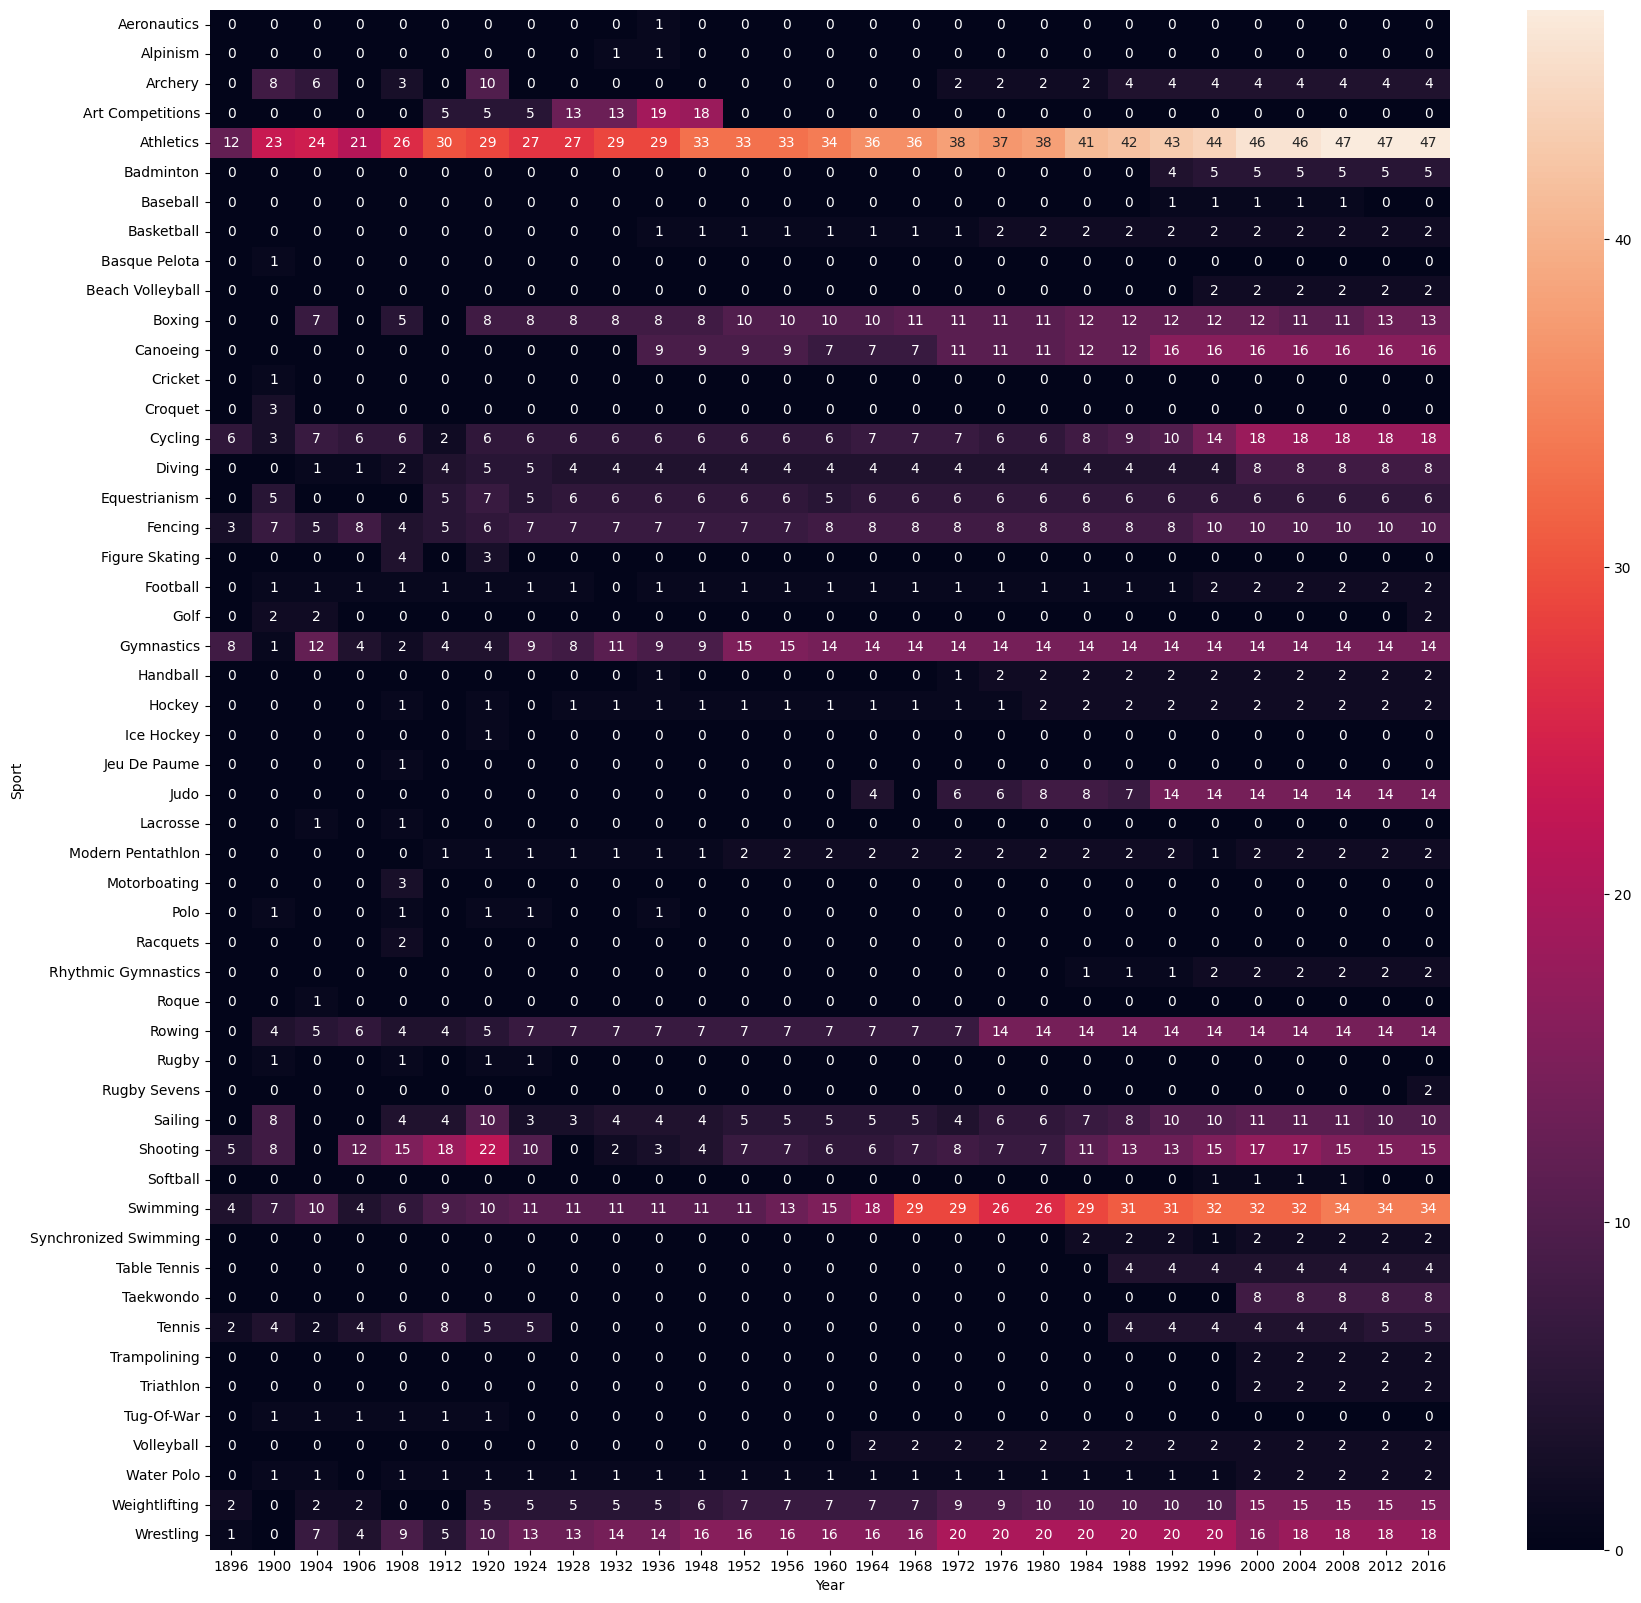

In [48]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)

In [49]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport!='OverAll':
        temp_df = temp_df[temp_df['Sport']==sport]
    x = temp_df[['Name','Sport','region']].value_counts().reset_index().head(15)
    x=x.rename(columns={'count':'Medals','region':'Region'})
    return x

In [50]:
most_successful(df,'OverAll')

,Name,Sport,Region,Medals
0,"Michael Fred Phelps, II",Swimming,USA,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,18
2,Nikolay Yefimovich Andrianov,Gymnastics,Russia,15
3,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,13
4,Edoardo Mangiarotti,Fencing,Italy,13
5,Takashi Ono,Gymnastics,Japan,13
6,Birgit Fischer-Schmidt,Canoeing,Germany,12
7,Aleksey Yuryevich Nemov,Gymnastics,Russia,12
8,Ryan Steven Lochte,Swimming,USA,12
9,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,USA,12


In [51]:
most_successful(df,'Athletics')

,Name,Sport,Region,Medals
0,Paavo Johannes Nurmi,Athletics,Finland,12
1,"Frederick Carlton ""Carl"" Lewis",Athletics,USA,10
2,"Raymond Clarence ""Ray"" Ewry",Athletics,USA,10
3,Merlene Joyce Ottey-Page,Athletics,Jamaica,9
4,Allyson Michelle Felix,Athletics,USA,9
5,Martin Joseph Sheridan,Athletics,USA,9
6,Veronica Angella Campbell-Brown,Athletics,Jamaica,8
7,Usain St. Leo Bolt,Athletics,Jamaica,8
8,"Viljo Eino ""Ville"" Ritola (Koukkari-)",Athletics,Finland,8
9,Shirley Barbara Strickland de la Hunty,Athletics,Australia,7


#### Country Wise
- country wise medal tally per year(line plot)
- what countries are good at heatmap
- most successfull athletes top-10

In [52]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

/tmp/ipykernel_91055/3249058805.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby(by=['Year']).count()['Medal'].reset_index()

In [54]:
fig = px.line(data_frame=final_df,x='Year',y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

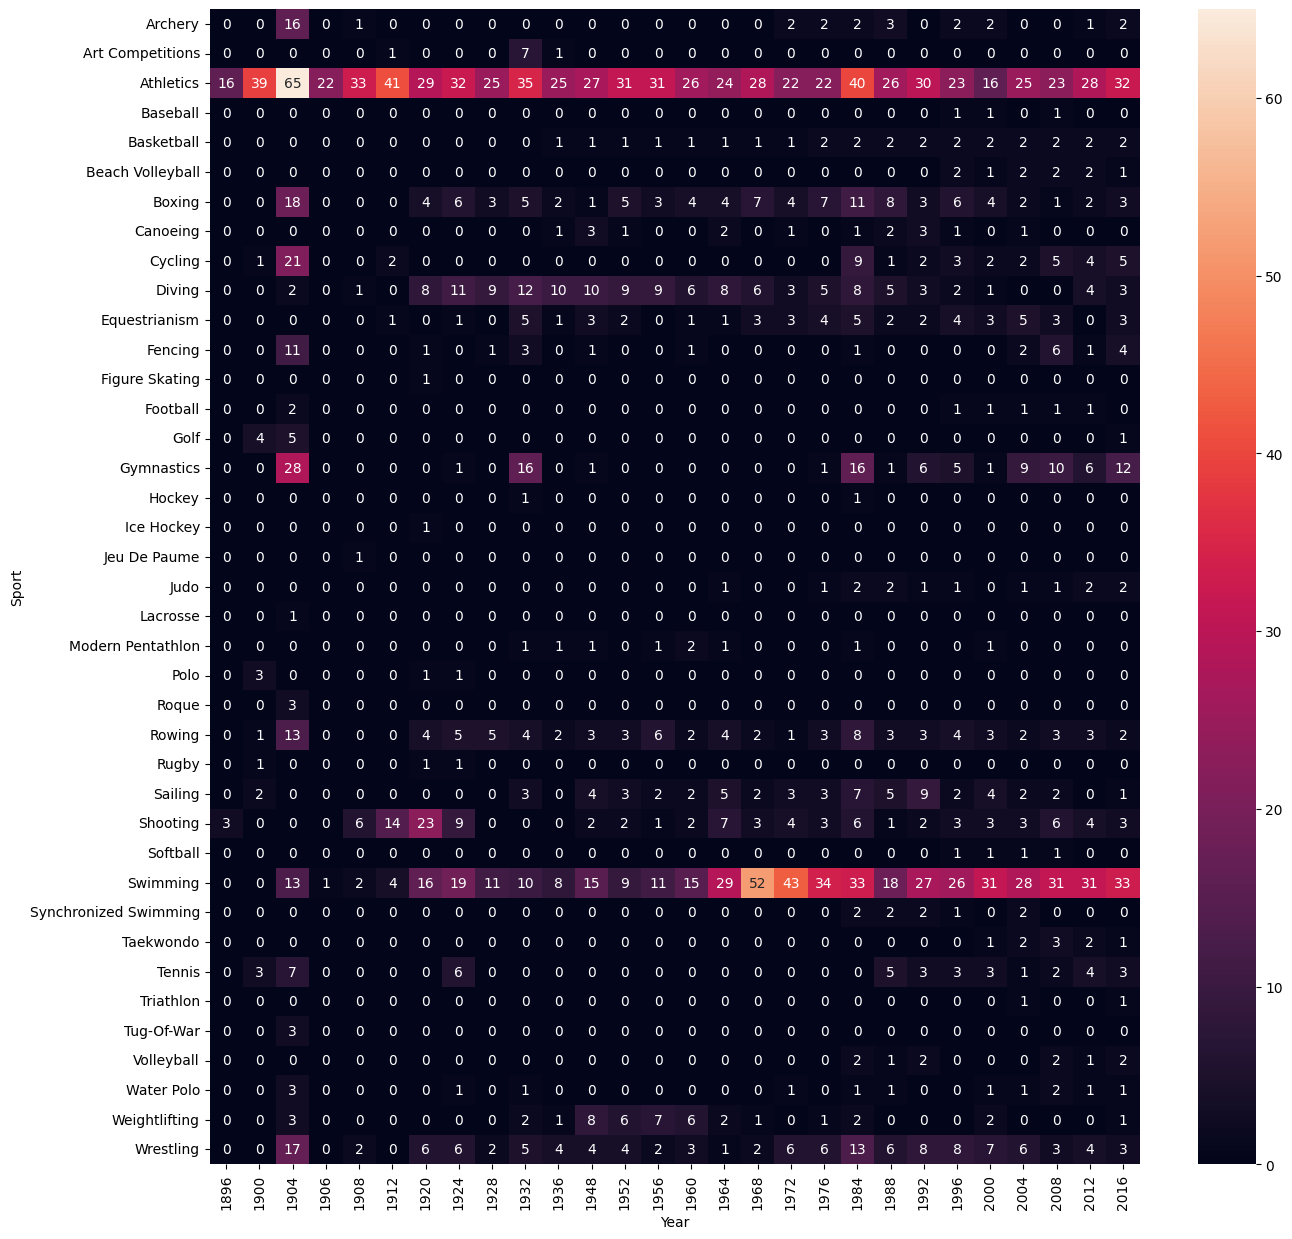

In [55]:
new_df = temp_df[temp_df['region']=='USA']
plt.figure(figsize=(15,15))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [56]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region']==country]
    x = temp_df[['Name','Sport']].value_counts().reset_index().head(15)
    x=x.rename(columns={'count':'Medals','region':'Region'})
    return x

In [57]:
most_successful(df,'Jamaica')

,Name,Sport,Medals
0,Merlene Joyce Ottey-Page,Athletics,9
1,Veronica Angella Campbell-Brown,Athletics,8
2,Usain St. Leo Bolt,Athletics,8
3,Shelly-Ann Fraser-Pryce,Athletics,6
4,Yohan Blake,Athletics,4
5,"Donald O'Reilly ""Don"" Quarrie",Athletics,4
6,Arthur Stanley Wint,Athletics,4
7,"Herbert Henry ""Herb"" McKenley",Athletics,4
8,Novlene Hilaire Williams-Mills,Athletics,4
9,Juliet Jean Cuthbert,Athletics,3


In [58]:
# Age distribution of Olympic Athletes
import plotly.figure_factory as ff

In [59]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

athlete_df['Age'].dropna()
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [60]:
famous_sports = df[df['Medal']=='Gold']['Sport']

In [61]:
famous_sports.unique()

array(['Tug-Of-War', 'Gymnastics', 'Handball', 'Sailing', 'Cycling',
       'Canoeing', 'Football', 'Water Polo', 'Rowing', 'Golf', 'Hockey',
       'Wrestling', 'Boxing', 'Basketball', 'Athletics', 'Baseball',
       'Taekwondo', 'Shooting', 'Volleyball', 'Equestrianism', 'Diving',
       'Swimming', 'Tennis', 'Fencing', 'Badminton', 'Rugby',
       'Weightlifting', 'Judo', 'Beach Volleyball', 'Rhythmic Gymnastics',
       'Archery', 'Triathlon', 'Softball', 'Polo', 'Modern Pentathlon',
       'Racquets', 'Croquet', 'Synchronized Swimming', 'Art Competitions',
       'Cricket', 'Rugby Sevens', 'Ice Hockey', 'Lacrosse',
       'Figure Skating', 'Table Tennis', 'Basque Pelota', 'Trampolining',
       'Alpinism', 'Motorboating', 'Jeu De Paume', 'Roque', 'Aeronautics'],
      dtype=object)

In [62]:
x = []
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
fig.show()

ValueError: min() arg is an empty sequence